# Household Poverty Level Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.regression.linear_model as sm
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
pwd

'C:\\Users\\keval\\Downloads'

In [4]:
df = pd.read_csv('C:\\Users\\keval\\Downloads\\train.csv')
df.head(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.0,121.0,1444,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,...,4,64,16,121,4,1.777778,1.0,121.0,64,4
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,NaN,0,...,0,49,16,81,4,16.000000,1.0,100.0,49,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,...,81,900,16,81,4,16.000000,1.0,100.0,900,4
9,ID_51f52fdd2,130000.0,1,2,0,1,1,0,NaN,0,...,121,784,16,81,4,16.000000,1.0,100.0,784,4


Displays all the columns of a dataframe

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
df.shape

(9557, 143)

So the dataset contains 9557 rows and 143 columns

# Splitting the Dataset into Train, Valid and Test

In [7]:
def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]


Here we are keeping the ration  70:15:15. Now dividing the dataset into train test only. After the data preprocessing we will divide the train into train and valid.

In [8]:
df_train,df_test= mydf_splitter(df,8124)
print(df_train.shape,df_test.shape)

(8124, 143) (1433, 143)


# Data Preprocessing

In [9]:
print(len(df_train.columns))

143


In [10]:
print(df_train.count())

Id                 8124
v2a1               2424
hacdor             8124
rooms              8124
hacapo             8124
                   ... 
SQBovercrowding    8124
SQBdependency      8124
SQBmeaned          8119
agesq              8124
Target             8124
Length: 143, dtype: int64


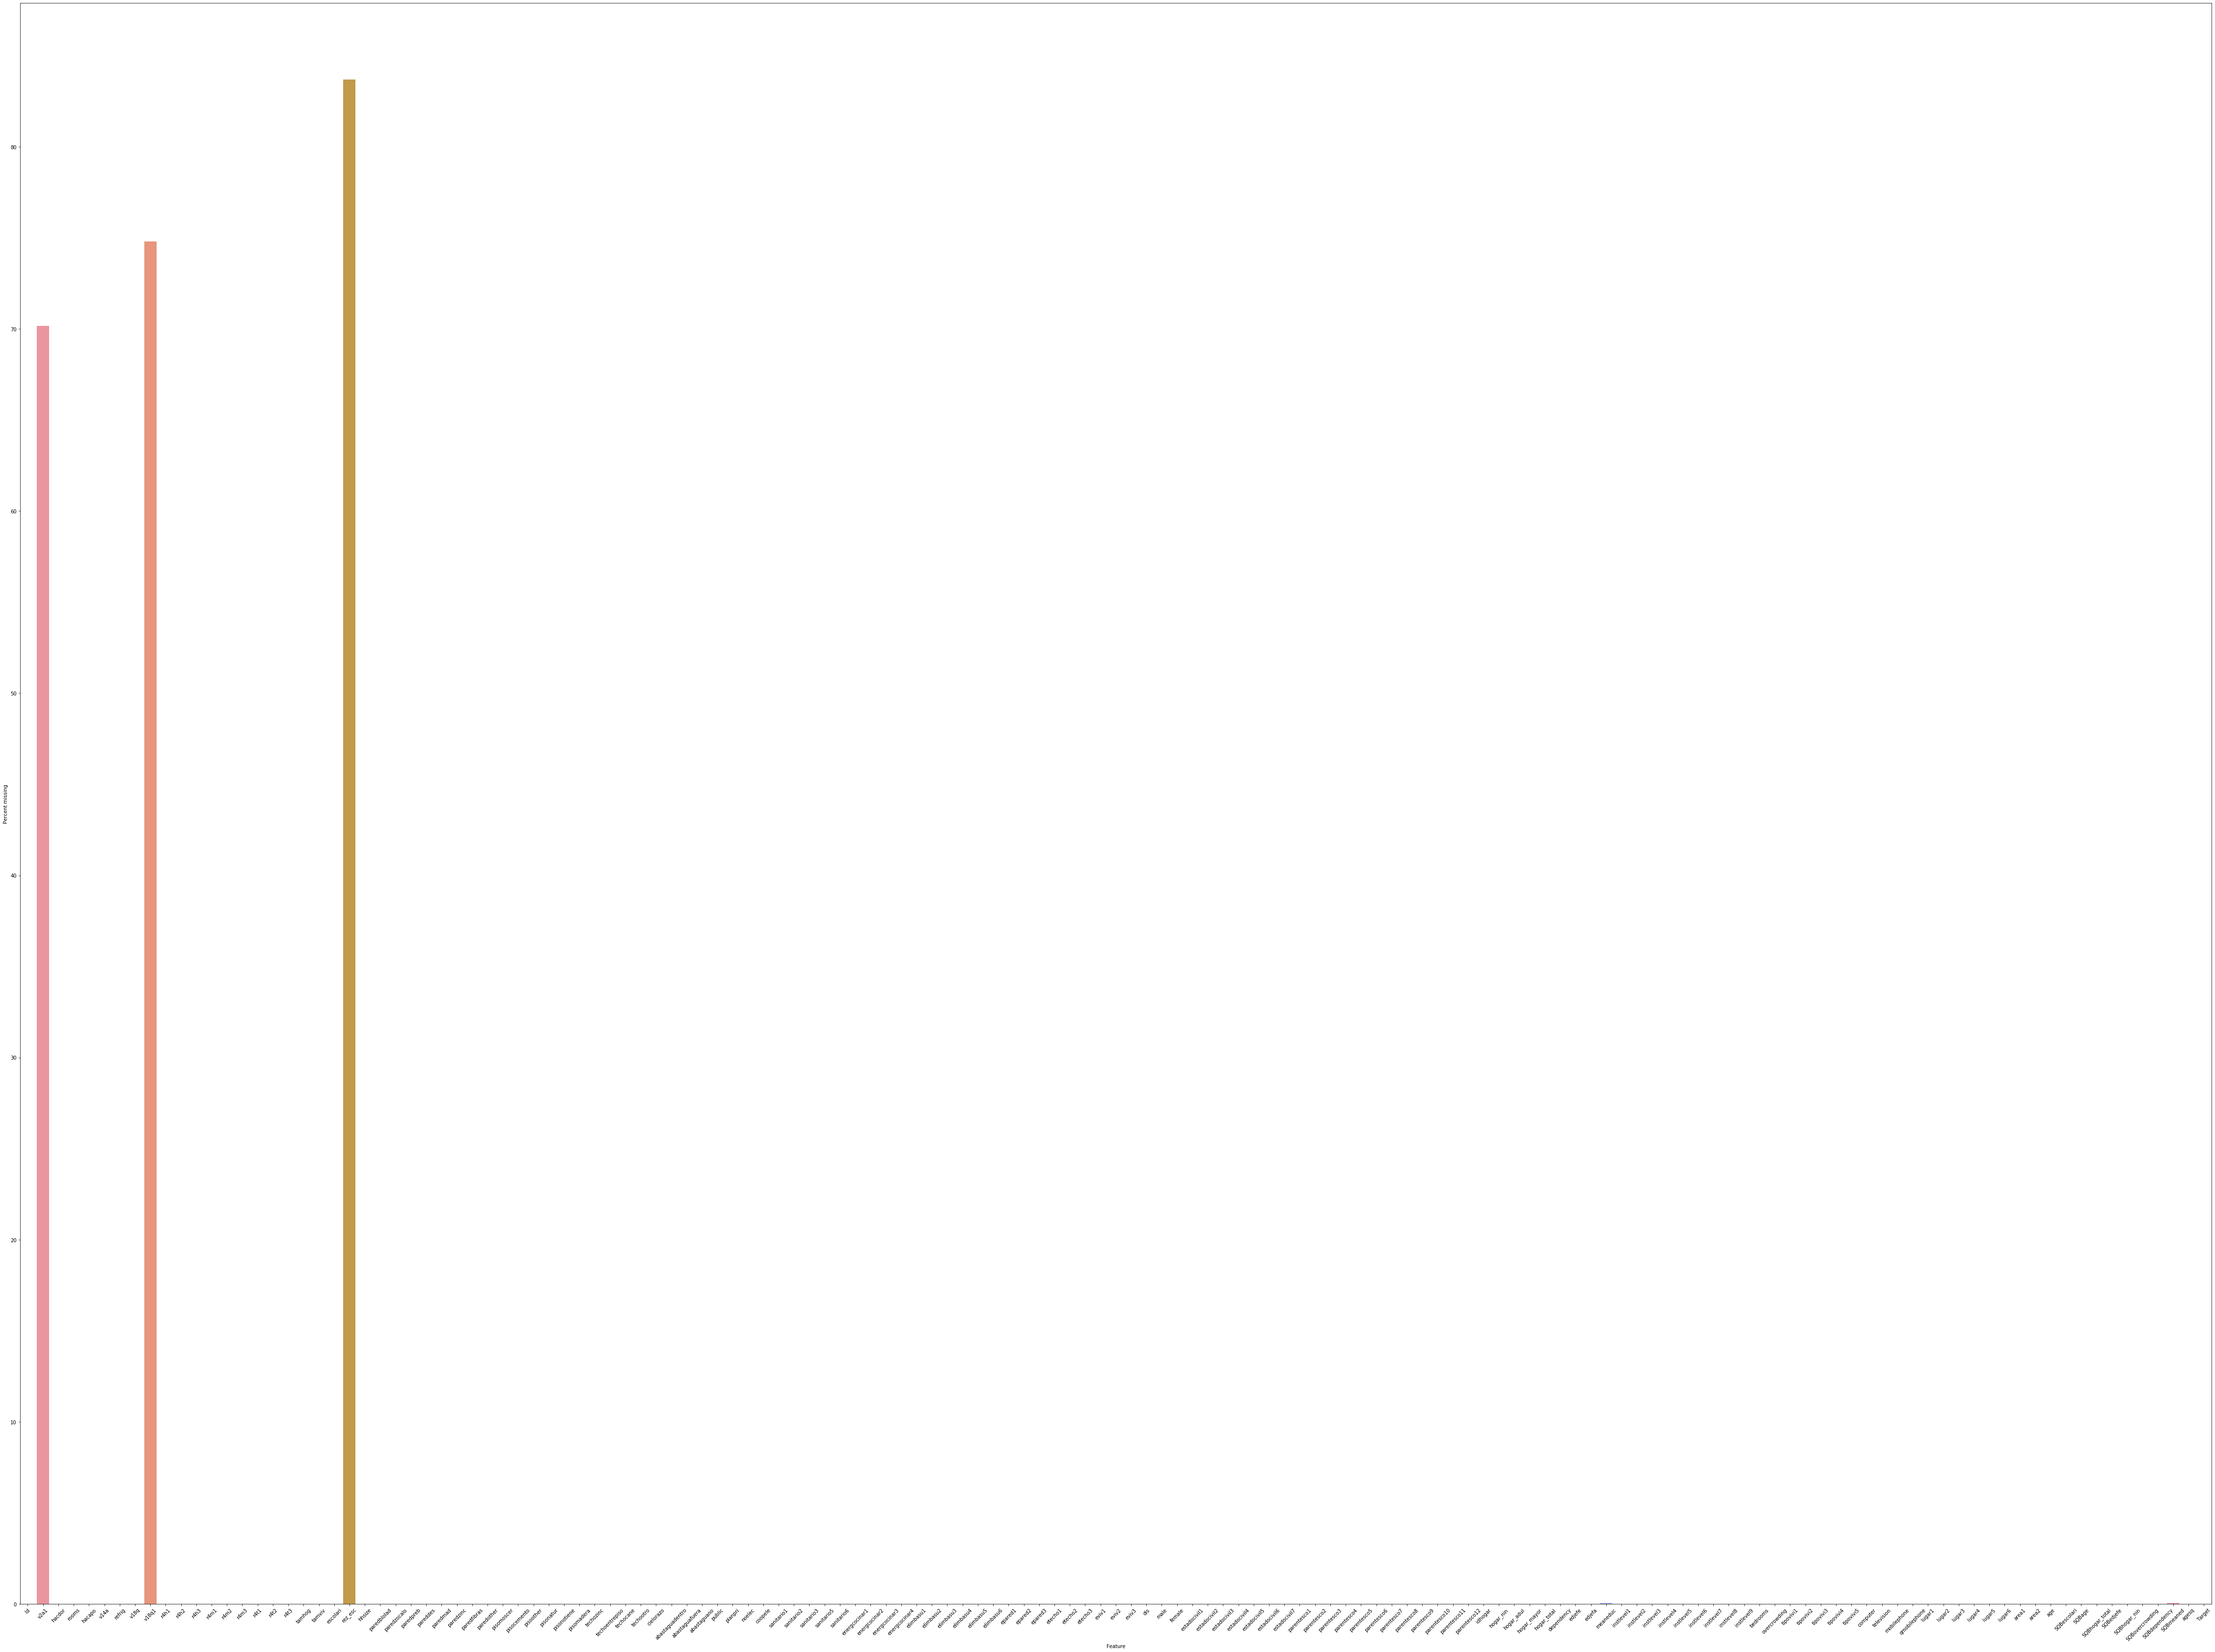

In [11]:
null_vals = df_train.isnull().sum()/len(df_train)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (80,60))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

From above figure we can see that the columns with name v2a1, v18q1, rez_esc have so many missing values so we can drop those columns

In [12]:
df_train = df_train.drop(["v2a1","v18q1","rez_esc"], axis = 1)
print(df_train.shape)


(8124, 140)


Columns having object datatype

In [13]:
df_train.columns[df_train.dtypes == 'object']

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

printing unique values of above columns

In [14]:
print(df_train.dependency.unique(),'\n')
print(df_train.edjefe.unique(),'\n')
print(df_train.edjefa.unique())

['no' '8' 'yes' '3' '.5' '.25' '2' '.66666669' '.33333334' '1.5'
 '.40000001' '.75' '1.25' '.2' '2.5' '1.2' '4' '1.3333334' '2.25'
 '.22222222' '5' '.83333331' '.80000001' '6' '3.5' '1.6666666'] 

['10' '12' 'no' '11' '9' '15' '4' '6' '8' '17' '7' '16' '14' '5' '21' '2'
 '19' 'yes' '3' '18' '13' '20'] 

['no' '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19'
 'yes' '21' '12' '2' '20' '18']


In [15]:
# Droping useless columns 
df_train.drop(['Id', 'idhogar'], axis = 1, inplace = True)

# Columns having both continuous and categorical data should be encoded using labelencoder or get_dummies
df_train.drop(['dependency', 'edjefe', 'edjefa'], axis = 1, inplace = True)

In [16]:
df_train.shape

(8124, 135)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 135 entries, hacdor to Target
dtypes: float64(5), int64(130)
memory usage: 8.4 MB


Total number of rows in the dataframe

In [18]:
print(df_train.count().max())

8124


printing columns with missing rows

In [19]:
col_mask = df_train.columns[df_train.isnull().sum() > 0]
df_train[col_mask].head(10)

,meaneduc,SQBmeaned
0,10.0,100.0
1,12.0,144.0
2,11.0,121.0
3,11.0,121.0
4,11.0,121.0
5,11.0,121.0
6,11.0,121.0
7,10.0,100.0
8,10.0,100.0
9,10.0,100.0


Droping rows with missing values

In [20]:
df_train.dropna(inplace = True)


In [21]:
df_train.shape

(8119, 135)

 Total Number of rows left

In [22]:
print(df_train.count().max())

8119


Total Number of columns left

In [23]:
print(len(df_train.columns))

135


Total Number of null entries

In [24]:
print(df_train.isnull().sum().sum())

0


In [25]:
# Splitting data into dependent and independent variable
# X is the independent variables matrix
X = df_train.drop('Target', axis = 1)

In [26]:
# y is the dependent variable vector
y = df_train.Target

# Feature Scaling 

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [28]:
# Checking p-values of dataframe features

#import statsmodels.formula.api as sm
X1 = np.append(arr = np.ones((8119,1)).astype(int), values = X, axis = 1)
X_opt = X1[:, range(0,135)]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

C:\Users\keval\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\keval\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\keval\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\keval\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     42.84
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:18:34   Log-Likelihood:                -9652.1
No. Observations:                8119   AIC:                         1.952e+04
Df Residuals:                    8010   BIC:                         2.029e+04
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3370      0.009    375.929      0.000       3.320       3.354
x1            -0.0797      0.017     -4.665      0.000      -0.113      -0.046
x2            -0.0185      0.017     -1.110      0.267      -0.051       0.014
x3             0.0110      0.013      0.817      0.414      -0.015       0.037
x4             0.0271      0.012      2.308      0.021       0.004       0.050
x5             0.0105      0.010      1.054      0.292      -0.009       0.030
x6             0.0806      0.010      7.889      0.000       0.061       0.101
x7            -0.0509      0.017     -2.998      0.003      -0.084      -0.018
x8            -0.0290      0.022     -1.305      0.192      -0.073       0.015
x9            -0.0544      0.028     -1.960      0.050      -0.109    1.62e-05
x10           -0.0594      0.018     -3.296      0.001      -0.095      -0.024
x11           -0.0860      0.022     -3.903      0.000      -0.129      -0.043
x12           -0.1003      0.026     -3.865      0.000      -0.151      -0.049
x13           -0.0723      0.021     -3.367      0.001      -0.114      -0.030
x14           -0.0768      0.030     -2.600      0.009      -0.135      -0.019
x15           -0.1052      0.036     -2.915      0.004      -0.176      -0.034
x16            0.0880      0.038      2.315      0.021       0.013       0.163
x17           -0.0462      0.039     -1.183      0.237      -0.123       0.030
x18           -0.1519      0.098     -1.542      0.123      -0.345       0.041
x19            0.0880      0.038      2.315      0.021       0.013       0.163
x20            0.0308      0.007      4.620      0.000       0.018       0.044
x21           -0.0198      0.008     -2.372      0.018      -0.036      -0.003
x22           -0.0276      0.007     -3.826      0.000      -0.042      -0.013
x23            0.0358      0.021      1.695      0.090      -0.006       0.077
x24           -0.0196      0.009     -2.135      0.033      -0.038      -0.002
x25            0.0251      0.010      2.431      0.015       0.005       0.045
x26           -0.0112      0.009     -1.257      0.209      -0.029       0.006
x27            0.0089      0.009      0.971      0.331      -0.009       0.027
x28            0.0172      0.007      2.550      0.011       0.004       0.030
x29           -0.0065      0.007     -0.927      0.354      -0.020       0.007
x30            0.0231      0.009      2.582      0.010       0.006       0.041
x31           -0.0029      0.011     -0.271      0.786      -0.024       0.018
x32           -0.0393      0.012     -3.257      0.001      -0.063      -0.016
x33           -0.0040      0.009     -0.441      0.659      -0.022       0.014
x34            0.0267      0.044      0.606      0.544      -0.060       0.113
x35            0.0198      0.035      0.562      0.574      -0.049       0.089
x3

# Feature Selection using Backward Elimination technique

In [29]:
def backwardelimination(x, sl):
    numvars = len(X[0])
    for i in range(0, numvars):
        regressor_OLS = sm.OLS(y,x).fit()
        maxvar = max(regressor_OLS.pvalues)
        if maxvar> sl:
            for j in range(0, numvars-i):
                if(regressor_OLS.pvalues[j].astype(float) == maxvar):
                    x = np.delete(x,j,1)
    regressor_OLS.summary()
    return x

sl = 0.05
X_opt = X1[:, range(0,135)]
X_modeled = backwardelimination(X_opt, sl)

In [30]:
# Removing additional columns added for backward elimination
X = X[:,1:]

In [31]:
X.shape

(8119, 133)

In [32]:
# Applying XGBoost Classifier

from xgboost import XGBClassifier
clc = XGBClassifier(n_estimators = 10)
clc.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [33]:
scores1 = []
scores2 = []
scores3 = []
scores4 = []


In [34]:
# Applying 5-fold cross-validation to X_modeled matrix

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clc, X = X_modeled, y = y, cv = 5)
scores1.append(accuracies.mean())
accuracies.mean()

0.6430294738042914

In [35]:
# Applying 5-fold cross-validation to X matrix

accuracies = cross_val_score(estimator = clc, X = X, y = y, cv = 5)
scores1.append(accuracies.mean())
accuracies.mean()

0.6425370903257009

# Feature Selection using PCA(principal component analysis)

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X1 = pca.fit_transform(X)
ev = pca.explained_variance_ratio_
ev

array([1.00942787e-01, 6.79192761e-02, 4.02703348e-02, 3.19643900e-02,
       2.82505314e-02, 2.51184459e-02, 2.34353961e-02, 2.05944125e-02,
       1.90069074e-02, 1.78172961e-02, 1.58135687e-02, 1.55988365e-02,
       1.54209971e-02, 1.48422746e-02, 1.37330209e-02, 1.29152967e-02,
       1.24707404e-02, 1.20586037e-02, 1.18013497e-02, 1.14514162e-02,
       1.11214266e-02, 1.10683267e-02, 1.04737068e-02, 9.98265574e-03,
       9.68319855e-03, 9.51565166e-03, 9.38905739e-03, 9.35815792e-03,
       9.17022048e-03, 9.16574967e-03, 9.08429243e-03, 8.95708747e-03,
       8.84364492e-03, 8.81211194e-03, 8.63810511e-03, 8.57007239e-03,
       8.41276174e-03, 8.19470137e-03, 8.17403250e-03, 8.03908181e-03,
       7.99517226e-03, 7.88980804e-03, 7.83807544e-03, 7.81758572e-03,
       7.74348121e-03, 7.70583748e-03, 7.66578781e-03, 7.63369414e-03,
       7.60010308e-03, 7.46485110e-03, 7.44948356e-03, 7.39447351e-03,
       7.30771556e-03, 7.27447420e-03, 7.23021735e-03, 7.16481624e-03,
      

In [37]:
# Using 4-Component PCA

pca = PCA(n_components = 4)
X1 = pca.fit_transform(X)
ev = pca.explained_variance_ratio_
ev

array([0.10094279, 0.06791928, 0.04027033, 0.03196422])

In [38]:
# Applying 5-fold cross-validation to X1 matrix
clc1 = XGBClassifier()
clc1.fit(X1, y)

accuracies = cross_val_score(estimator = clc1, X = X1, y = y, cv = 5)
scores1.append(accuracies.mean())
accuracies.mean()

0.6564698347452287

# Comparing accuracies of different models using barplot

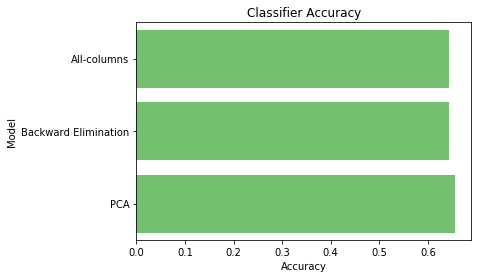

In [39]:
log_cols = ["Model", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

import seaborn as sns

acc_dict = {'All-columns': scores1[0],'Backward Elimination': scores1[1], 'PCA': scores1[2]}

for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Model', data=log, color="g")


In [40]:
# Applying Random-Forest Classifier

from sklearn.ensemble import RandomForestClassifier
clc = RandomForestClassifier(n_estimators = 10)
clc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
# Applying 5-fold cross-validation to X matrix

accuracies = cross_val_score(estimator = clc, X = X, y = y, cv = 5)
scores2.append(accuracies.mean())
accuracies.mean()

0.57880779116648

In [42]:
# Applying 5-fold cross-validation to X_modeled matrix

accuracies = cross_val_score(estimator = clc, X = X_modeled, y = y, cv = 5)
scores2.append(accuracies.mean())
accuracies.mean()


0.6061626707908866

In [43]:
# Using PCA components
clc1 = RandomForestClassifier(n_estimators = 10)
clc1.fit(X1, y)

accuracies = cross_val_score(estimator = clc1, X = X1, y = y, cv = 5)
scores2.append(accuracies.mean())
accuracies.mean()

0.5901839431261584

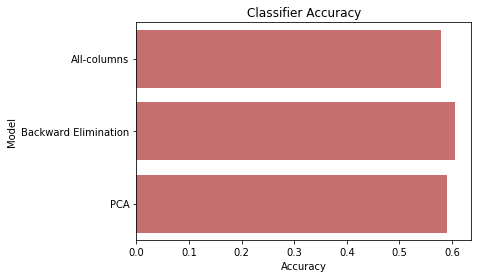

In [44]:
log_cols = ["Model", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {'All-columns': scores2[0],'Backward Elimination': scores2[1], 'PCA': scores2[2]}

for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Model', data=log, color="r")

# Applying K-Neighbors Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier
clc = KNeighborsClassifier(n_neighbors = 5)
clc.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
# Applying 5-fold cross-validation to X matrix
accuracies = cross_val_score(estimator = clc, X = X, y = y, cv = 5)
scores3.append(accuracies.mean())
accuracies.mean()

0.5843942506216369

In [47]:
# Applying 5-fold cross-validation to X_modeled matrix
accuracies = cross_val_score(estimator = clc, X = X_modeled, y = y, cv = 5)
scores3.append(accuracies.mean())
accuracies.mean()

0.5906748894705456

In [48]:
clc1 = KNeighborsClassifier(n_neighbors = 10)
clc1.fit(X1, y)

accuracies = cross_val_score(estimator = clc1, X = X1, y = y, cv = 5)
scores3.append(accuracies.mean())
accuracies.mean()

0.5995488697862158

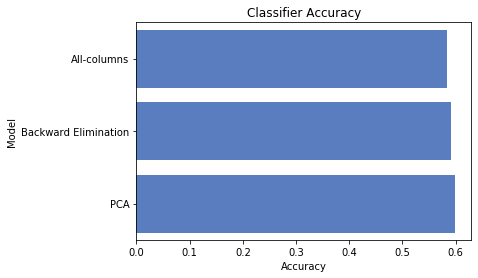

In [49]:
##Visualizing accuracies of different models using barplot
log_cols = ["Model", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {'All-columns': scores3[0],'Backward Elimination': scores3[1], 'PCA': scores3[2]}

for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Model', data=log, color="b")


# Hyperparameter Tuning using valild data

In [50]:
df_train.shape

(8119, 135)

Splitting the train data into train and valid

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X1, y, test_size = 0.18, random_state = 42)

In [52]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(6657, 4) (1462, 4) (6657,) (1462,)


Applying Artificial Neural Networks

In [53]:
def func():    
    
    clc = None

    #initializing ANN
    clc = Sequential()

    #Adding input layer and 1st hidden layer
    clc.add(Dense(activation="relu", units=300, kernel_initializer="uniform", input_dim=4))

    #Adding 2nd hidden layer
    clc.add(Dense(activation="relu", units=300, kernel_initializer="uniform"))

    #Adding output layer
    clc.add(Dense(activation="softmax", units=4, kernel_initializer="uniform"))

    #Compiling ANN
    clc.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return clc

estimator = KerasClassifier(build_fn = func, epochs = 10, batch_size = 5)


#fitting ANN
estimator.fit(X_train, y_train)


Epoch 1/10
6657/6657 [==============================] - 6s 872us/step - loss: 0.8991 - accuracy: 0.6605
Epoch 2/10
6657/6657 [==============================] - 6s 855us/step - loss: 0.8810 - accuracy: 0.6590
Epoch 3/10
6657/6657 [==============================] - 6s 853us/step - loss: 0.8763 - accuracy: 0.6616
Epoch 4/10
6657/6657 [==============================] - 6s 888us/step - loss: 0.8688 - accuracy: 0.6629
Epoch 5/10
6657/6657 [==============================] - 6s 915us/step - loss: 0.8636 - accuracy: 0.6631
Epoch 6/10
6657/6657 [==============================] - 6s 951us/step - loss: 0.8610 - accuracy: 0.6682
Epoch 7/10
6657/6657 [==============================] - 6s 921us/step - loss: 0.8555 - accuracy: 0.6659
Epoch 8/10
6657/6657 [==============================] - 6s 894us/step - loss: 0.8481 - accuracy: 0.6697
Epoch 9/10
6657/6657 [==============================] - 6s 943us/step - loss: 0.8468 - accuracy: 0.6733
Epoch 10/10
6657/6657 [==============================] - 6s 895u

# Predicting test set results

In [54]:
pred = estimator.predict(X_valid)
print(np.unique(pred))

pred1 = pd.DataFrame(pred)
pred1.columns = ['Target']
pred1.head()

[1 2 3 4]


,Target
0,4
1,4
2,4
3,2
4,4


In [55]:
y_valid = y_valid.reset_index()
y_valid.drop('index', axis = 1, inplace = True)
y_valid.head()

,Target
0,4
1,4
2,4
3,3
4,4


In [56]:
# Calculating Accuracy
acc = (pred1 == y_valid).sum()/len(y_valid)
scores4.append(acc[0])

In [57]:
# Splitting X_modeled dataset

X1_train, X1_valid, y1_train, y1_valid = train_test_split(X_modeled, y, test_size = 0.25, random_state = 42)

In [58]:
y1_train = pd.get_dummies(y1_train)

In [59]:
# Applying Artificial Neural Networks

def func():    
    
    clc = None

    #initializing ANN
    clc = Sequential()

    #Adding input layer and 1st hidden layer
    clc.add(Dense(activation="relu", units=100, kernel_initializer="uniform", input_dim=X1_train.shape[1]))

    #Adding 2nd hidden layer
    clc.add(Dense(activation="relu", units=100, kernel_initializer="uniform"))

    #Adding output layer
    clc.add(Dense(activation="softmax", units=4, kernel_initializer="uniform"))

    #Compiling ANN
    clc.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return clc

estimator = KerasClassifier(build_fn = func, epochs = 10, batch_size = 5)


#fitting ANN
estimator.fit(X1_valid, y1_valid)

Epoch 1/10
2030/2030 [==============================] - 1s 677us/step - loss: 0.9106 - accuracy: 0.6532
Epoch 2/10
2030/2030 [==============================] - 1s 632us/step - loss: 0.7933 - accuracy: 0.6985
Epoch 3/10
2030/2030 [==============================] - 1s 629us/step - loss: 0.7094 - accuracy: 0.7315
Epoch 4/10
2030/2030 [==============================] - 1s 621us/step - loss: 0.6299 - accuracy: 0.7709
Epoch 5/10
2030/2030 [==============================] - 1s 650us/step - loss: 0.5302 - accuracy: 0.8099
Epoch 6/10
2030/2030 [==============================] - 1s 692us/step - loss: 0.4343 - accuracy: 0.8473
Epoch 7/10
2030/2030 [==============================] - 1s 703us/step - loss: 0.3742 - accuracy: 0.8655
Epoch 8/10
2030/2030 [==============================] - 1s 702us/step - loss: 0.3033 - accuracy: 0.8897
Epoch 9/10
2030/2030 [==============================] - 1s 709us/step - loss: 0.2329 - accuracy: 0.9212
Epoch 10/10
2030/2030 [==============================] - 1s 699u

In [60]:
# Predicting test set results

pred = estimator.predict(X1_valid)
print(np.unique(pred))

pred1 = pd.DataFrame(pred)
pred1.columns = ['Target']
pred1.head()

[1 2 3 4]


,Target
0,4
1,4
2,4
3,3
4,4


In [61]:
# Re-indexing y_test
y1_valid = y1_valid.reset_index()
y1_valid.drop('index', axis = 1, inplace = True)
y1_valid.head()

,Target
0,4
1,4
2,4
3,3
4,4


In [62]:
# Calculating Accuracy
acc = (pred1 == y1_valid).sum()/len(y1_valid)
scores4.append(acc[0])

In [63]:
max(scores3)

0.5995488697862158

In [64]:
## To save score of each model used
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

# Comparing Accuries

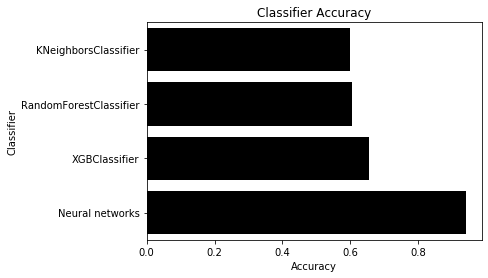

In [65]:
import seaborn as sns

acc_dict = {'KNeighborsClassifier':max(scores3),'RandomForestClassifier': max(scores2), 'XGBClassifier':max(scores1), 'Neural networks':max(scores4)}

for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="black")

# Testing on Test Data

In [66]:
df_test.shape

(1433, 143)

In [67]:
print(len(df_test.columns))

143


In [68]:
print(df_test.count())

Id                 1433
v2a1                273
hacdor             1433
rooms              1433
hacapo             1433
                   ... 
SQBovercrowding    1433
SQBdependency      1433
SQBmeaned          1433
agesq              1433
Target             1433
Length: 143, dtype: int64


In [69]:
import seaborn as sns

# Data Preprocessing

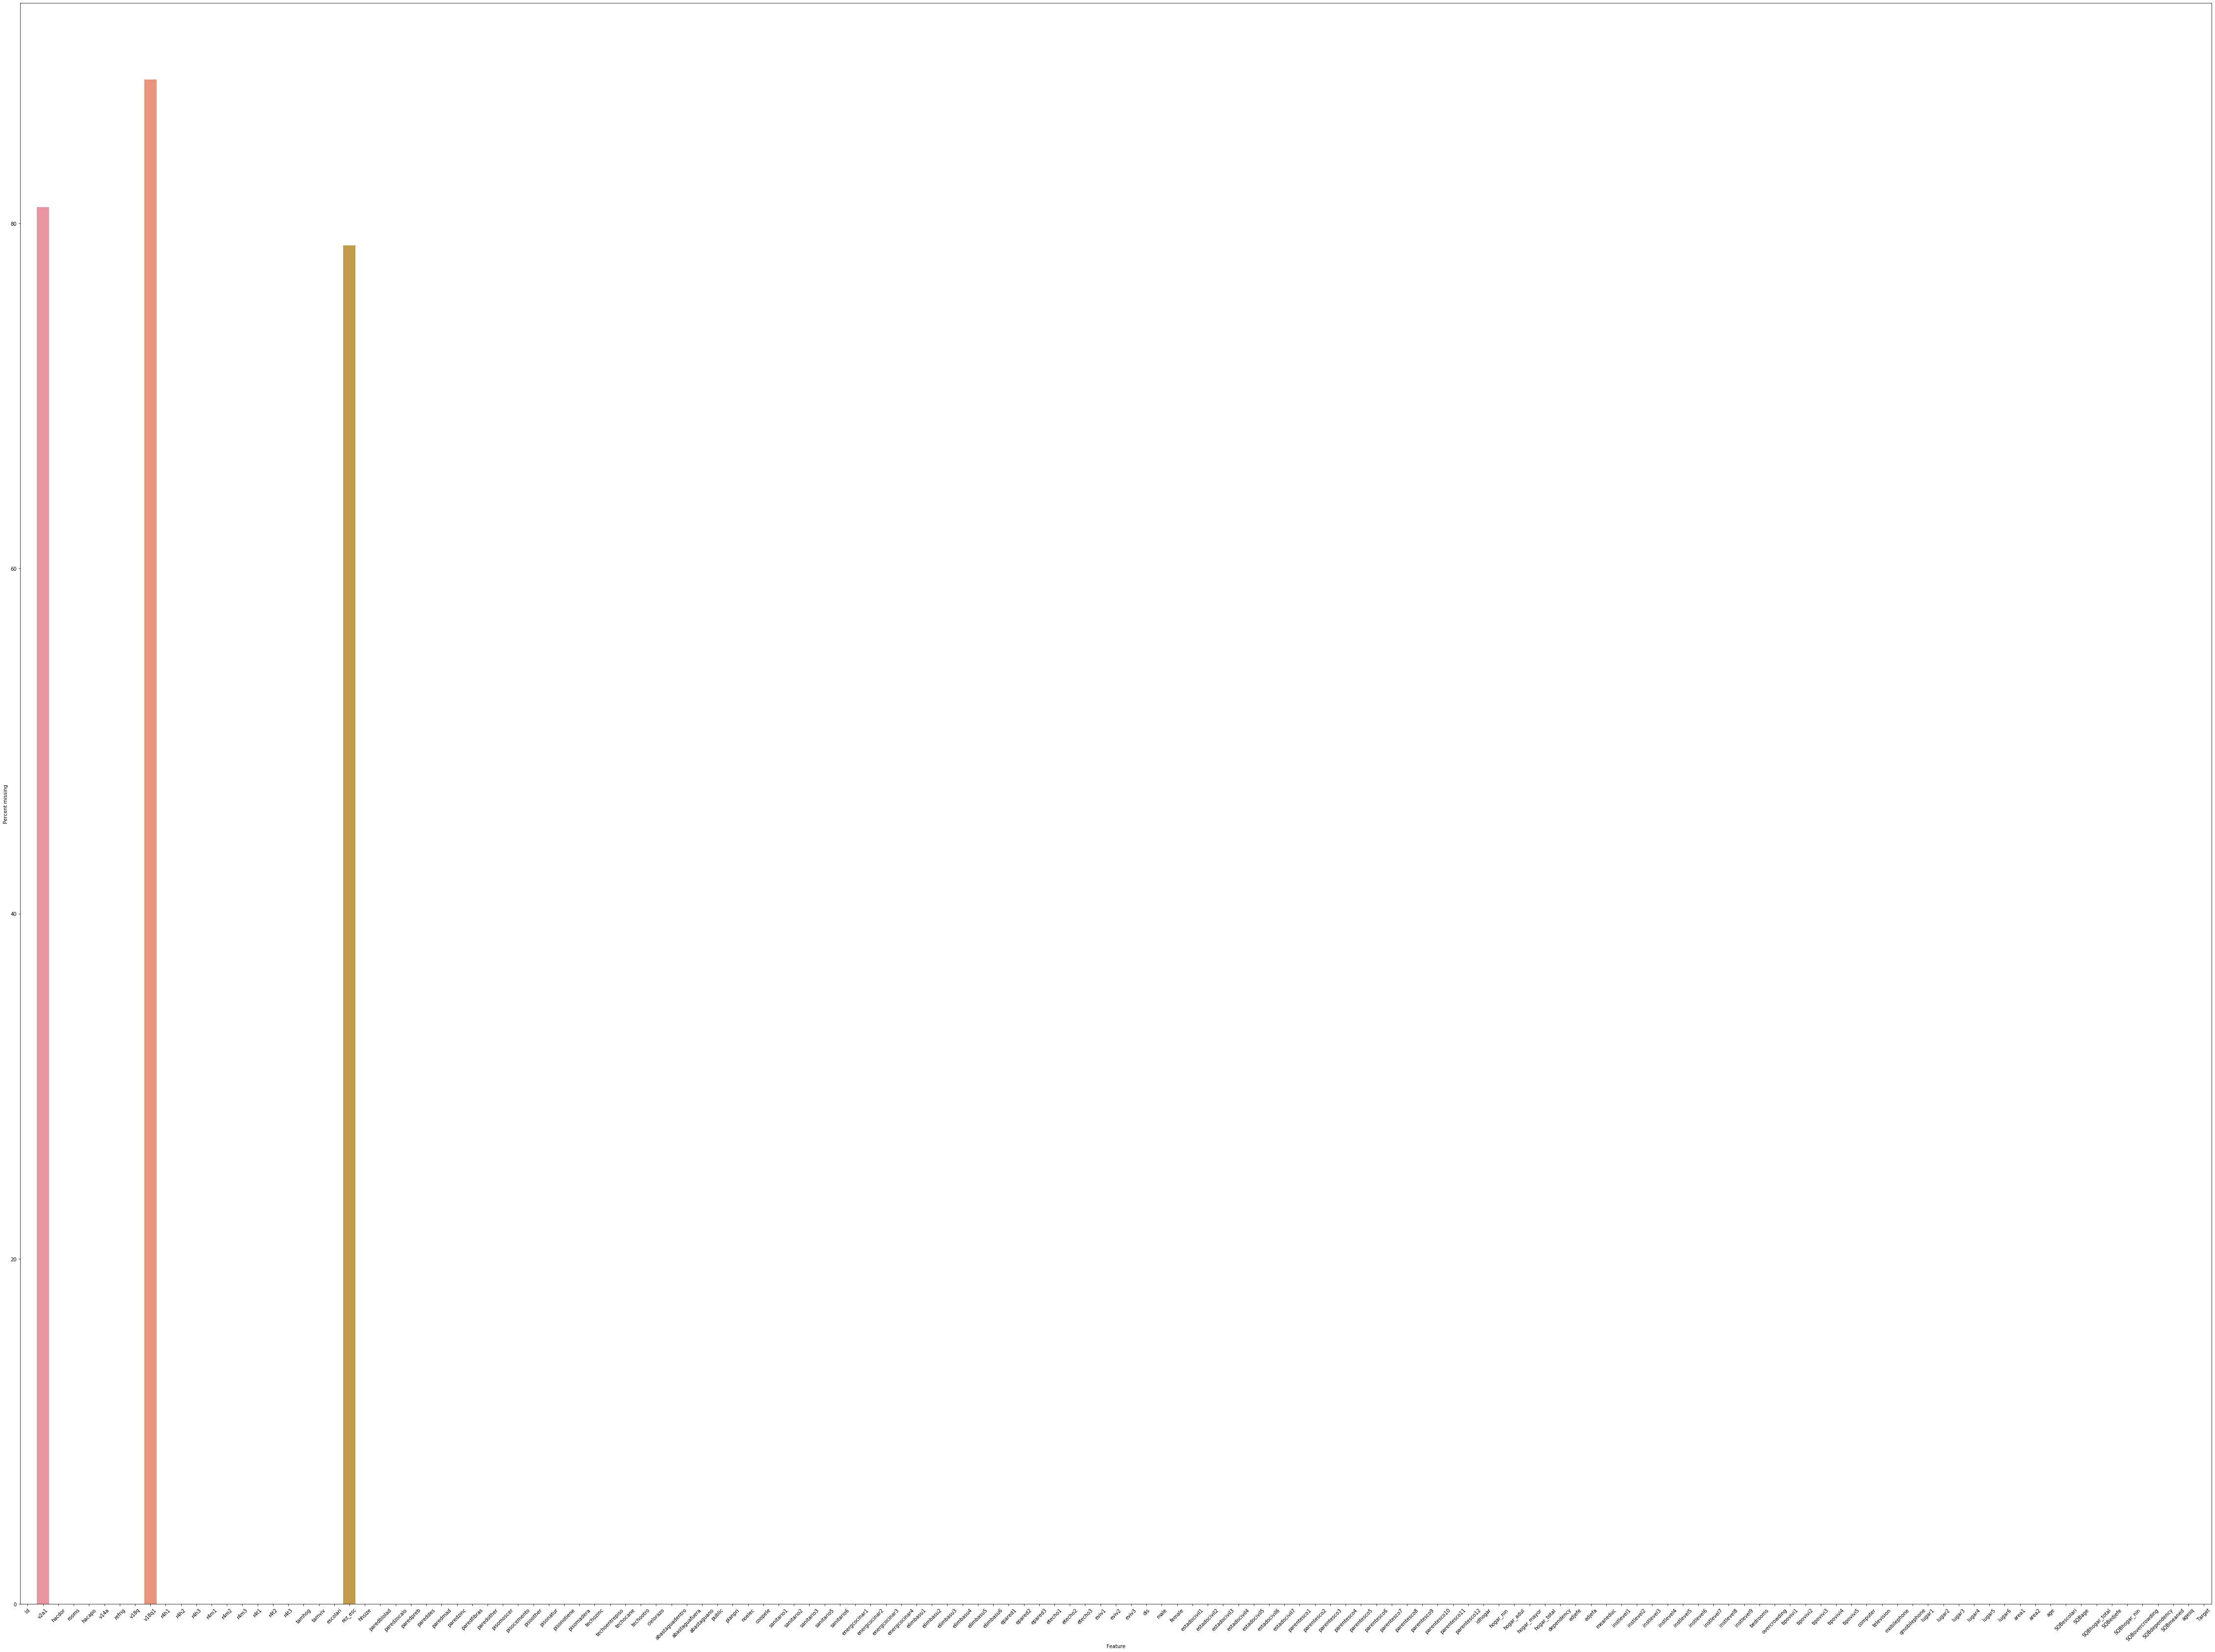

In [70]:
null_vals = df_test.isnull().sum()/len(df_test)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (80,60))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [71]:
df_test = df_test.drop(["v2a1","v18q1","rez_esc"], axis = 1)
print(df_test.shape)

(1433, 140)


In [72]:
# Columns having object datatype
df_test.columns[df_test.dtypes == 'object']

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [73]:
# printing unique values of above columns
print(df_test.dependency.unique(),'\n')
print(df_test.edjefe.unique(),'\n')
print(df_test.edjefa.unique())

['.40000001' '1.5' 'yes' '8' 'no' '2' '.5' '3' '.33333334' '4' '.2857143'
 '.25' '.2' '1.3333334' '1.75' '.66666669' '3.5' '2.5' '.75' '.80000001'
 '.71428573' '1.25' '.16666667' '.60000002'] 

['2' 'no' '6' '11' '8' '9' '12' '5' '3' '4' '14' 'yes' '17' '7' '13' '16'
 '15' '10'] 

['no' '7' 'yes' '5' '16' '11' '17' '6' '9' '15' '10' '2' '8' '4' '3' '12'
 '13']


In [74]:
# Droping useless columns 
df_test.drop(['Id', 'idhogar'], axis = 1, inplace = True)

# Columns having both continuous and categorical data should be encoded using labelencoder or get_dummies
df_test.drop(['dependency', 'edjefe', 'edjefa'], axis = 1, inplace = True)

In [75]:
df_test.shape

(1433, 135)

In [76]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 8124 to 9556
Columns: 135 entries, hacdor to Target
dtypes: float64(5), int64(130)
memory usage: 1.5 MB


In [77]:
# Total number of rows in the dataframe
print(df_test.count().max())

1433


In [78]:
# printing columns with missing rows
col_mask = df_test.columns[df_test.isnull().sum() > 0]
df_test[col_mask].head(10)

""
8124
8125
8126
8127
8128
8129
8130
8131
8132
8133


In [79]:
# Droping rows with missing values
df_test.dropna(inplace = True)

In [80]:
# Total Number of rows left
print(df_test.count().max())

# Total Number of columns left
print(len(df_test.columns))

# Total Number of null entries
print(df_test.isnull().sum().sum())


1433
135
0


In [81]:
# Splitting data into dependent and independent variable
# X is the independent variables matrix
X = df_test.drop('Target', axis = 1)

# y is the dependent variable vector
y = df_test.Target


In [82]:
# Scaling Features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X = ss.fit_transform(X)

In [83]:
# Checking p-values of dataframe features

#import statsmodels.formula.api as sm
X1 = np.append(arr = np.ones((1433,1)).astype(int), values = X, axis = 1)
X_opt = X1[:, range(0,135)]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

C:\Users\keval\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\keval\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\keval\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\keval\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     12.72
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          9.38e-132
Time:                        21:22:02   Log-Likelihood:                -1633.7
No. Observations:                1433   AIC:                             3465.
Df Residuals:                    1334   BIC:                             3987.
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1033      0.021    149.806      0.000       3.063       3.144
x1             0.0579      0.049      1.190      0.234      -0.038       0.153
x2             0.1339      0.051      2.611      0.009       0.033       0.235
x3            -0.0263      0.054     -0.490      0.624      -0.132       0.079
x4            -0.0209      0.043     -0.488      0.625      -0.105       0.063
x5            -0.0049      0.026     -0.192      0.848      -0.056       0.046
x6             0.0610      0.025      2.410      0.016       0.011       0.111
x7             0.0905      0.042      2.156      0.031       0.008       0.173
x8             0.1633      0.058      2.794      0.005       0.049       0.278
x9             0.1959      0.072      2.713      0.007       0.054       0.338
x10            0.0615      0.048      1.290      0.197      -0.032       0.155
x11            0.1525      0.058      2.640      0.008       0.039       0.266
x12            0.1535      0.069      2.211      0.027       0.017       0.290
x13            0.0990      0.056      1.784      0.075      -0.010       0.208
x14            0.2117      0.075      2.804      0.005       0.064       0.360
x15            0.2307      0.093      2.493      0.013       0.049       0.412
x16           -0.2634      0.095     -2.761      0.006      -0.451      -0.076
x17           -0.2266      0.161     -1.411      0.158      -0.542       0.088
x18           -0.2739      0.203     -1.349      0.178      -0.672       0.124
x19           -0.2634      0.095     -2.761      0.006      -0.451      -0.076
x20            0.0297      0.018      1.679      0.093      -0.005       0.064
x21            0.0020      0.021      0.096      0.924      -0.039       0.043
x22           -0.0215      0.019     -1.139      0.255      -0.059       0.016
x23            0.0290      0.023      1.245      0.213      -0.017       0.075
x24           -0.0222      0.022     -1.014      0.311      -0.065       0.021
x25            0.0478      0.024      2.024      0.043       0.001       0.094
x26           -0.0048      0.031     -0.156      0.876      -0.065       0.055
x27         1.442e-15   9.03e-16      1.597      0.111    -3.3e-16    3.21e-15
x28            0.0311      0.020      1.581      0.114      -0.007       0.070
x29            0.0093      0.017      0.551      0.582      -0.024       0.043
x30         2.887e-16   1.63e-16      1.770      0.077   -3.13e-17    6.09e-16
x31           -0.0173      0.015     -1.148      0.251      -0.047       0.012
x32            0.0530      0.030      1.746      0.081      -0.007       0.112
x33           -0.0909      0.023     -3.930      0.000      -0.136      -0.046
x34           -0.0052      0.011     -0.469      0.639      -0.027       0.017
x35            0.0176      0.015      1.210      0.227      -0.011       0.046
x3

# Feature Selection

In [84]:
def backwardelimination(x, sl):
    numvars = len(X[0])
    for i in range(0, numvars):
        regressor_OLS = sm.OLS(y,x).fit()
        maxvar = max(regressor_OLS.pvalues)
        if maxvar> sl:
            for j in range(0, numvars-i):
                if(regressor_OLS.pvalues[j].astype(float) == maxvar):
                    x = np.delete(x,j,1)
    regressor_OLS.summary()
    return x

sl =0.05
X_opt = X1[:, range(0,135)]
X_modeled = backwardelimination(X_opt, sl)

In [85]:
X_modeled.shape

(1433, 41)

In [86]:
X.shape

(1433, 134)

In [87]:
from xgboost import XGBClassifier
clc = XGBClassifier(n_estimators = 10)
clc.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Feature Selection

In [88]:
# Feature Selection using PCA(principal component analysis)

from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X1 = pca.fit_transform(X)
ev = pca.explained_variance_ratio_
ev

array([1.11363595e-01, 6.52895193e-02, 4.86876507e-02, 3.47601289e-02,
       3.02423058e-02, 2.84195428e-02, 2.73163074e-02, 2.67238903e-02,
       2.21607044e-02, 2.08082486e-02, 2.00072114e-02, 1.98353749e-02,
       1.80992795e-02, 1.70655654e-02, 1.55310110e-02, 1.53747250e-02,
       1.47946886e-02, 1.40167874e-02, 1.34667408e-02, 1.28126059e-02,
       1.24146421e-02, 1.21445257e-02, 1.14444256e-02, 1.12081553e-02,
       1.10710938e-02, 1.07280558e-02, 1.04033888e-02, 9.95037815e-03,
       9.82453262e-03, 9.58580512e-03, 9.37380102e-03, 9.27244387e-03,
       9.09901638e-03, 9.05543697e-03, 8.80144339e-03, 8.70504635e-03,
       8.67121636e-03, 8.50636513e-03, 8.28172080e-03, 8.19042192e-03,
       8.01154392e-03, 7.97394406e-03, 7.84573109e-03, 7.77759876e-03,
       7.67451907e-03, 7.44876919e-03, 7.42696401e-03, 7.33014227e-03,
       7.08362025e-03, 7.02104531e-03, 6.87171791e-03, 6.76484462e-03,
       6.58912898e-03, 6.45204891e-03, 6.14217726e-03, 6.11851647e-03,
      

In [89]:
# Using 4-Component PCA

pca = PCA(n_components = 4)
X1 = pca.fit_transform(X)
ev = pca.explained_variance_ratio_
ev

array([0.1113636 , 0.06528952, 0.04868765, 0.03475925])

In [90]:
X1.shape

(1433, 4)

In [91]:
#Importing libraries

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [92]:
print(X1.shape, y.shape)

(1433, 4) (1433,)


# Applying Artificial Neural Networks

In [93]:

def func():    
    
    clc = None

    #initializing ANN
    clc = Sequential()

    #Adding input layer and 1st hidden layer
    clc.add(Dense(activation="relu", units=300, kernel_initializer="uniform", input_dim=4))

    #Adding 2nd hidden layer
    clc.add(Dense(activation="relu", units=300, kernel_initializer="uniform"))

    #Adding output layer
    clc.add(Dense(activation="softmax", units=4, kernel_initializer="uniform"))

    #Compiling ANN
    clc.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return clc

estimator = KerasClassifier(build_fn = func, epochs = 10, batch_size = 5)


#fitting ANN
estimator.fit(X_train, y_train)


Epoch 1/10
6657/6657 [==============================] - 5s 760us/step - loss: 0.8989 - accuracy: 0.6543
Epoch 2/10
6657/6657 [==============================] - 6s 843us/step - loss: 0.8807 - accuracy: 0.6617
Epoch 3/10
6657/6657 [==============================] - 6s 894us/step - loss: 0.8748 - accuracy: 0.6604
Epoch 4/10
6657/6657 [==============================] - 6s 900us/step - loss: 0.8724 - accuracy: 0.6617
Epoch 5/10
6657/6657 [==============================] - 6s 898us/step - loss: 0.8690 - accuracy: 0.6617
Epoch 6/10
6657/6657 [==============================] - 6s 898us/step - loss: 0.8626 - accuracy: 0.6649
Epoch 7/10
6657/6657 [==============================] - 6s 895us/step - loss: 0.8597 - accuracy: 0.6635
Epoch 8/10
6657/6657 [==============================] - 6s 897us/step - loss: 0.8535 - accuracy: 0.6665
Epoch 9/10
6657/6657 [==============================] - 6s 898us/step - loss: 0.8509 - accuracy: 0.6673
Epoch 10/10
6657/6657 [==============================] - 6s 895u

# Accuracy Predection

In [94]:
# Predicting test set results

pred = estimator.predict(X1)
print(np.unique(pred))

pred1 = pd.DataFrame(pred)
pred1.columns = ['Target']
pred1.head()

[2 3 4]


,Target
0,4
1,4
2,4
3,4
4,4


In [95]:
# Re-indexing y_test
y1_valid = y.reset_index()
y1_valid.drop('index', axis = 1, inplace = True)
y1_valid.head()

,Target
0,3
1,4
2,4
3,4
4,4


In [96]:
acc = (pred1 == y1_valid).sum()/len(y1_valid)


In [97]:
acc

Target    0.553385
dtype: float64

# We got the Accuracy as 0.553385!!!